#### STDLIB

In [57]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

data_path = '/Users/Alex/Desktop/APO/Q4JH03/UT161120/ARCTIC/'
fits_name = 'wasp44b_end_i_24.'
num_file = 597 - 478 + 1
cat_name = 'wasp44b'

def confirm_coords_txt(ra, dec, cat_ra, cat_dec, maxiter=6, tol=1e-6):
    """
    Searches for object between two catalogues
    by iteratively checking and reducing error 
    between coordinates until _one_ match is found.
    
    Assumes RA and Dec from primary catalogue are known, 
    and searches through secondary catalogue to find index
    of object with same coordinates in second catalogue. 
    """
    i = 0
    while i <= maxiter:
        err = 10 ** -(1 + i) # start with 0.1 'just to be safe'
        selection = (abs(cat_ra - ra) <= err) & (abs(cat_dec - dec) <= err) # use RAdeg, DECdeg
        matches = cat_ra[selection]
        if len(matches) == 1:
            return np.where(cat_ra == matches[0]) # index according to catalogue; remember to subtract by 1 for python!
            break
        elif err <= tol:
            print 'Could not find match'
            break
        i += 1

#### Find target and refstars

In [65]:
target_mag, ref1_mag, ref2_mag, ref3_mag, ref4_mag, ref5_mag, ref6_mag,\
ref7_mag, ref8_mag, ref9_mag, ref10_mag = np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file),\
np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file)

target_magerr, ref1_magerr, ref2_magerr, ref3_magerr, ref4_magerr, ref5_magerr, ref6_magerr,\
ref7_magerr, ref8_magerr, ref9_magerr, ref10_magerr = np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file),\
np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file), np.zeros(num_file)

target_coord = SkyCoord('00 15 37 -11 56 20', unit=(u.hourangle, u.deg)).to_string('decimal').split()
target_ra, target_dec = float(target_coord[0]), float(target_coord[1])

for n in range(478, 598):
    mag, magerr, ra, dec = np.loadtxt(data_path + cat_name + str(n) + '.cat', skiprows=9, usecols=(3, 4, 7, 8), unpack=True)
    
    target_index = confirm_coords_txt(target_ra, target_dec, ra, dec)
    target_mag[n - 478], target_magerr[n - 478] = mag[target_index], magerr[target_index]
    
    



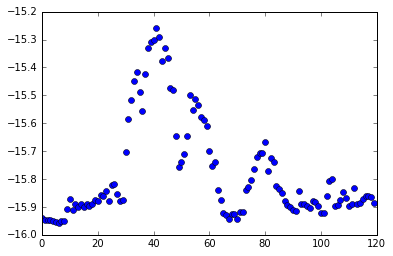

In [70]:
plt.errorbar(range(0, num_file), target_mag, yerr=[target_magerr, target_magerr], linestyle='None', marker='o')
plt.show()